In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [84]:
df=pd.read_csv('Titanic.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
df.shape

(891, 12)

In [5]:
male_surv=df[(df['Survived']==1) & (df['Sex']=='male')].shape[0]
female_surv=df[(df['Survived']==1) & (df['Sex']=='female')].shape[0]
total_surv=df[df['Survived']==1].shape[0]

In [6]:
#percentage male survived
(male_surv/total_surv)*100

31.871345029239766

In [7]:
#percentage female survived
(female_surv/total_surv)*100

68.12865497076024

In [89]:
for i in df.Name:
    n=len(i)
    pos=0
    for j in range(n):
        if (i[j]==','):
            pos=j
            break
    sur=i[0:pos]
    print(sur)

Braund
Cumings
Heikkinen
Futrelle
Allen
Moran
McCarthy
Palsson
Johnson
Nasser
Sandstrom
Bonnell
Saundercock
Andersson
Vestrom
Hewlett
Rice
Williams
Vander Planke
Masselmani
Fynney
Beesley
McGowan
Sloper
Palsson
Asplund
Emir
Fortune
O'Dwyer
Todoroff
Uruchurtu
Spencer
Glynn
Wheadon
Meyer
Holverson
Mamee
Cann
Vander Planke
Nicola-Yarred
Ahlin
Turpin
Kraeff
Laroche
Devaney
Rogers
Lennon
O'Driscoll
Samaan
Arnold-Franchi
Panula
Nosworthy
Harper
Faunthorpe
Ostby
Woolner
Rugg
Novel
West
Goodwin
Sirayanian
Icard
Harris
Skoog
Stewart
Moubarek
Nye
Crease
Andersson
Kink
Jenkin
Goodwin
Hood
Chronopoulos
Bing
Moen
Staneff
Moutal
Caldwell
Dowdell
Waelens
Sheerlinck
McDermott
Carrau
Ilett
Backstrom
Ford
Slocovski
Fortune
Celotti
Christmann
Andreasson
Chaffee
Dean
Coxon
Shorney
Goldschmidt
Greenfield
Doling
Kantor
Petranec
Petroff
White
Johansson
Gustafsson
Mionoff
Salkjelsvik
Moss
Rekic
Moran
Porter
Zabour
Barton
Jussila
Attalah
Pekoniemi
Connors
Turpin
Baxter
Andersson
Hickman
Moore
Nasser
Webber
Whi

In [8]:
df[df.Pclass==1].Age.mean()

38.233440860215055

In [9]:
df[df.Pclass==2].Age.mean()

29.87763005780347

In [10]:
df[df.Pclass==3].Age.mean()

25.14061971830986

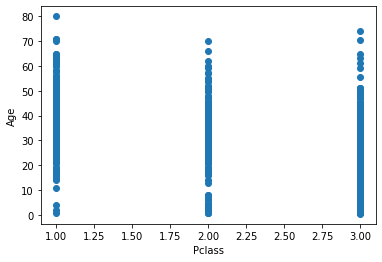

In [11]:
plt.scatter(df.Pclass,df.Age)
plt.xlabel('Pclass')
plt.ylabel('Age')
plt.show()

<BarContainer object of 891 artists>

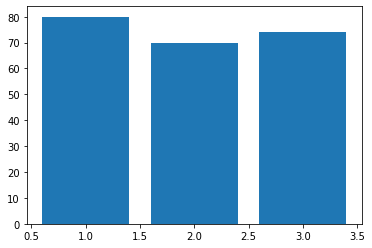

In [12]:
plt.bar(df.Pclass,df.Age)

In [13]:
df.groupby(by=df.Pclass, group_keys=False).apply(lambda x: df.Age).dropna(axis=1)

Age,0,1,2,3,4,6,7,8,9,10,...,880,881,882,883,884,885,886,887,889,890
Pclass,,,,,,,,,,,,,,,,,,,,,
1,22.0,38.0,26.0,35.0,35.0,54.0,2.0,27.0,14.0,4.0,...,25.0,33.0,22.0,28.0,25.0,39.0,27.0,19.0,26.0,32.0
2,22.0,38.0,26.0,35.0,35.0,54.0,2.0,27.0,14.0,4.0,...,25.0,33.0,22.0,28.0,25.0,39.0,27.0,19.0,26.0,32.0
3,22.0,38.0,26.0,35.0,35.0,54.0,2.0,27.0,14.0,4.0,...,25.0,33.0,22.0,28.0,25.0,39.0,27.0,19.0,26.0,32.0


In [14]:
df.Survived.corr(df.Pclass)

-0.3384810359610148

In [15]:
#very low correlation

In [16]:
df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [ ]:
df[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

In [17]:
df[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


<AxesSubplot:>

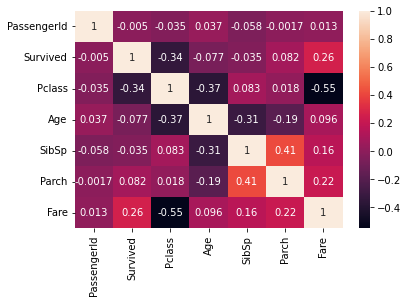

In [19]:
corr = df.corr()
sns.heatmap(corr,annot=True)

In [20]:
#looking at the row of survived, fare and pclass are correlated lowly and rest are not correlated

In [21]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

In [35]:
t=TransactionEncoder()
df1=df[df.Survived==1]
temp = t.fit(df1).transform(df1)
df2 = pd.DataFrame(temp)
df2

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,False,False,False,False,True,False,True,False,False,True,...,False,False,True,False,True,True,False,False,False,False
1,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,True,False,False,True,True,False
2,False,False,False,False,False,False,True,False,False,True,...,True,False,False,False,False,True,False,False,False,False
3,False,False,False,False,False,True,False,False,False,True,...,False,True,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
337,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
338,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
339,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
340,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [44]:
temp=apriori(df2, min_support=0.01,use_colnames=True)
temp

,support,itemsets
0,0.020468,(9)
1,0.023392,(13)
2,0.011696,(16)
3,0.014620,(22)
4,0.011696,"(9, 13)"
5,0.011696,"(9, 22)"
6,0.011696,"(13, 22)"


In [45]:
rules=association_rules(temp,metric='confidence',min_threshold=0)
rules.sort_values(by=['confidence'],ascending=False).head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
3,(22),(9),0.014620,0.020468,0.011696,0.800000,39.085714,0.011397,4.897661
5,(22),(13),0.014620,0.023392,0.011696,0.800000,34.200000,0.011354,4.883041
0,(9),(13),0.020468,0.023392,0.011696,0.571429,24.428571,0.011217,2.278752
2,(9),(22),0.020468,0.014620,0.011696,0.571429,39.085714,0.011397,2.299220
1,(13),(9),0.023392,0.020468,0.011696,0.500000,24.428571,0.011217,1.959064
4,(13),(22),0.023392,0.014620,0.011696,0.500000,34.200000,0.011354,1.970760


In [51]:
xlx = pd.ExcelFile('Sales.xlsx')
ddf1=pd.read_excel(xlx,'Sheet1')
ddf2=pd.read_excel(xlx,'Sheet2')
ddf1

,Month,2001,2002,2003,2004,2005,2006,2007,2008,2009
0,January,139.7,165.1,177.8,228.6,266.7,431.8,381.0,431.8,495.3
1,February,114.3,177.8,203.2,254.0,317.5,457.2,406.4,444.5,533.4
2,March,101.6,177.8,228.6,226.7,368.3,457.2,431.8,495.3,635.0
3,April,152.4,203.2,279.4,342.9,431.8,482.6,457.2,533.4,673.1
4,May,215.9,241.3,317.5,355.6,457.2,533.4,495.3,558.8,749.3
5,June,228.6,279.1,330.2,406.4,571.5,622.3,584.2,647.7,812.8
6,July,215.9,292.1,368.3,444.5,546.1,660.4,609.6,673.1,800.1
7,August,190.5,317.5,355.6,431.8,482.6,520.7,558.8,660.4,736.6
8,September,177.8,203.2,241.3,330.2,431.8,508.0,508.0,609.6,685.5
9,October,139.7,177.8,215.9,330.2,406.4,482.6,495.3,584.2,635.0


In [66]:
ddf1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Month   12 non-null     object 
 1   2001    12 non-null     float64
 2   2002    12 non-null     float64
 3   2003    12 non-null     float64
 4   2004    12 non-null     float64
 5   2005    12 non-null     float64
 6   2006    12 non-null     float64
 7   2007    12 non-null     float64
 8   2008    12 non-null     float64
 9   2009    12 non-null     float64
dtypes: float64(9), object(1)
memory usage: 1.1+ KB


In [52]:
ddf2

,Years,Sales
0,2001-01-01,139.7
1,2001-02-01,114.3
2,2001-03-01,101.6
3,2001-04-01,152.4
4,2001-05-01,215.9
...,...,...
103,2009-08-01,736.6
104,2009-09-01,685.5
105,2009-10-01,635.0
106,2009-11-01,622.3


In [67]:
ddf2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Years   108 non-null    datetime64[ns]
 1   Sales   108 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 1.8 KB


In [53]:
ddf1.isnull().sum()

Month    0
2001     0
2002     0
2003     0
2004     0
2005     0
2006     0
2007     0
2008     0
2009     0
dtype: int64

In [54]:
#no missing values in sheet1

In [56]:
ddf2.isnull().sum()

Years    0
Sales    0
dtype: int64

In [57]:
#no missing values in sheet 2

In [68]:
ddf3=ddf2.groupby(pd.PeriodIndex(ddf2.Years, freq='Q'), axis=0).mean()
ddf3

,Sales
Years,
2001Q1,118.533333
2001Q2,198.966667
2001Q3,194.733333
2001Q4,143.933333
2002Q1,173.566667
2002Q2,241.200000
2002Q3,270.933333
2002Q4,173.566667
2003Q1,203.200000


<AxesSubplot:xlabel='Years'>

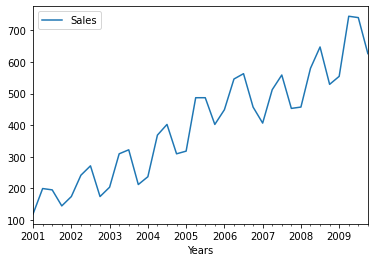

In [69]:
ddf3.plot()

In [80]:
for i in range(0,11):
    print(ddf3.iloc[i:i+4,:].sort_values(by='Sales',ascending=False))

             Sales
Years             
2001Q2  198.966667
2001Q3  194.733333
2001Q4  143.933333
2001Q1  118.533333
             Sales
Years             
2001Q2  198.966667
2001Q3  194.733333
2002Q1  173.566667
2001Q4  143.933333
             Sales
Years             
2002Q2  241.200000
2001Q3  194.733333
2002Q1  173.566667
2001Q4  143.933333
             Sales
Years             
2002Q3  270.933333
2002Q2  241.200000
2002Q1  173.566667
2001Q4  143.933333
             Sales
Years             
2002Q3  270.933333
2002Q2  241.200000
2002Q1  173.566667
2002Q4  173.566667
             Sales
Years             
2002Q3  270.933333
2002Q2  241.200000
2003Q1  203.200000
2002Q4  173.566667
             Sales
Years             
2003Q2  309.033333
2002Q3  270.933333
2003Q1  203.200000
2002Q4  173.566667
             Sales
Years             
2003Q3  321.733333
2003Q2  309.033333
2003Q1  203.200000
2002Q4  173.566667
             Sales
Years             
2003Q3  321.733333
2003Q2  309.033333
2003Q4  211.

In [81]:
#Every year 2nd and 3rd quarters yeild the highest sales

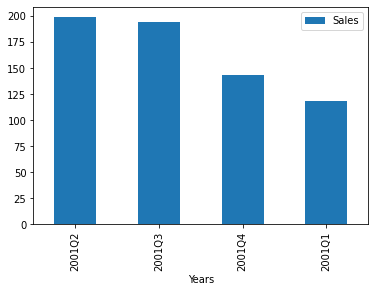

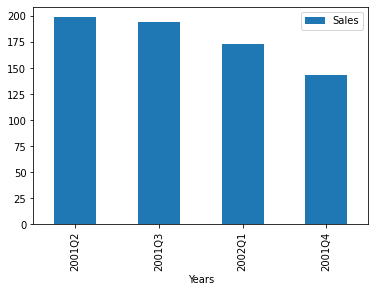

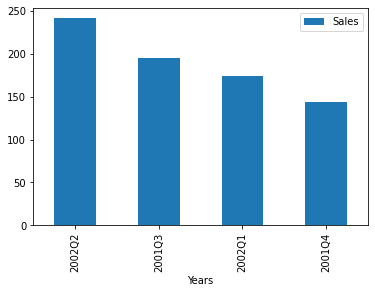

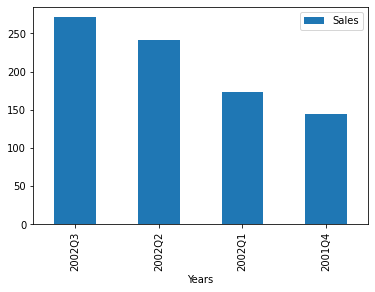

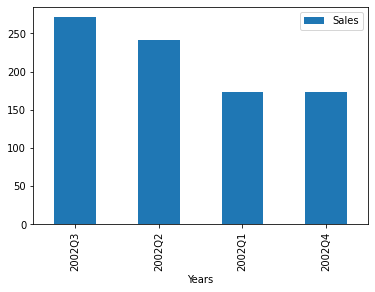

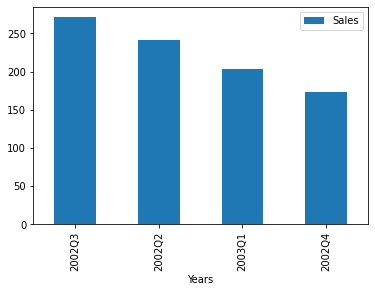

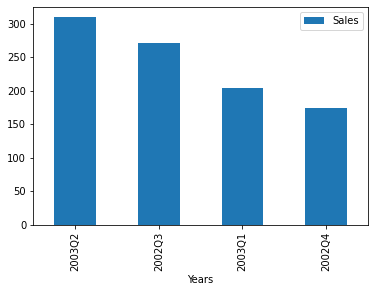

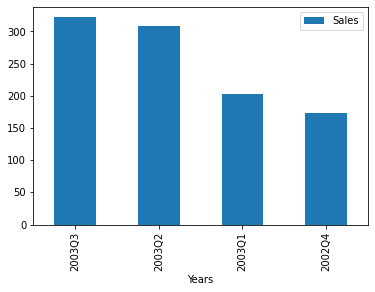

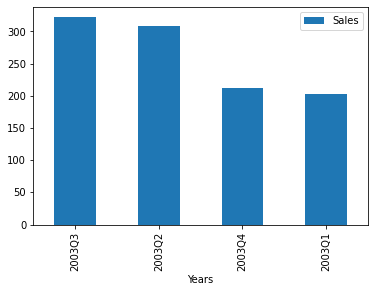

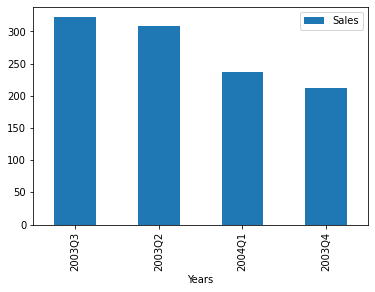

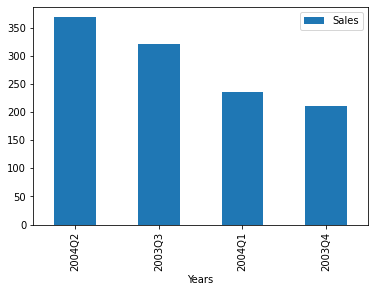

In [82]:
for i in range(0,11):
    ddf3.iloc[i:i+4,:].sort_values(by='Sales',ascending=False).plot.bar()

<AxesSubplot:xlabel='Years'>

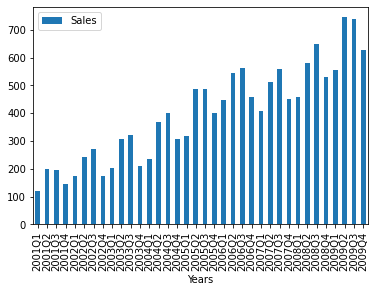

In [83]:
ddf3.plot.bar()